In [2]:
import math

import matplotlib.pyplot as plt
import mpld3
import numpy as np
import pydot
from IPython.display import HTML, SVG, Math, display
from pydrake.all import (AddMultibodyPlantSceneGraph, AddUnitQuaternionConstraintOnPlant, ConstantVectorSource,
                         ControllabilityMatrix, DiagramBuilder, DirectCollocation, DirectTranscription,
                         FirstOrderTaylorApproximation, Linearize,
                         LinearQuadraticRegulator, MatrixGain, LogVectorOutput,
                         MeshcatVisualizerCpp, MultibodyPositionToGeometryPose, MultibodyPlant, Parser,
                         PlanarSceneGraphVisualizer, PiecewisePolynomial,
                         Saturation, SceneGraph, Simulator, Sine, SnoptSolver, StartMeshcat,
                         ToLatex, TrajectorySource, WrapToSystem, Role, MeshcatVisualizerParams)
from pydrake.common.containers import namedview
from pydrake.examples.acrobot import (AcrobotGeometry, AcrobotInput,
                                      AcrobotPlant, AcrobotState)
from pydrake.examples.quadrotor import (QuadrotorGeometry, QuadrotorPlant,
                                        StabilizingLQRController)
from pydrake.solvers.mathematicalprogram import MathematicalProgram, Solve

from pydrake.systems.framework import TriggerType

from pydrake.math import (RigidTransform, RollPitchYaw)
from underactuated import FindResource, running_as_notebook
from underactuated.meshcat_cpp_utils import MeshcatSliders
from underactuated.quadrotor2d import Quadrotor2D, Quadrotor2DVisualizer

if running_as_notebook:
    mpld3.enable_notebook()


In [3]:
# Start the visualizer (run this cell only once, each instance consumes a port)
meshcat = StartMeshcat()

Meshcat is now available at https://846e1a7d-fb2b-4b22-a446-112d72222ae3.deepnoteproject.com


In [4]:
curr_urdf="""
<?xml version="1.0" ?>
<!-- =================================================================================== -->
<!-- |    This document was autogenerated by xacro from 3linksnake.xacro               | -->
<!-- |    EDITING THIS FILE BY HAND IS NOT RECOMMENDED                                 | -->
<!-- =================================================================================== -->
<!-- Import Drake and xacro tools to clean up urdf-->
<robot name="ChooChooSnake" xmlns:drake="http://drake.mit.edu">
  <!-- ######################## BEGIN ASSEMBLING URDF WITH MACROS ######################## -->
  <link name="ground">
    <visual>
      <origin rpy="0 0 0" xyz="0 0 -5"/>
      <geometry>
        <box size="1000 1000 10"/>
      </geometry>
      <material>
        <color rgba="0.93 .74 .4 1"/>
      </material>
    </visual>
    <collision>
      <origin rpy="0 0 0" xyz="0 0 -5"/>
      <geometry>
        <box size="1000 1000 10"/>
      </geometry>
      <material>
        <color rgba="0.93 .74 .4 1"/>
      </material>
      <drake:mu_dynamic value="0.8"/>
      <drake:mu_static value="1.0"/>
    </collision>
  </link>
  <joint name="ground_weld" type="fixed">
    <parent link="world"/>
    <child link="ground"/>
  </joint>
  <!-- Segments -->
  <link name="seg0">
    <inertial>
      <origin xyz="0 0 0.15"/>
      <mass value="5"/>
      <inertia ixx="1.7041666666666666" ixy="0" ixz="0" iyy="0.14166666666666664" iyz="0" izz="1.7708333333333333"/>
    </inertial>
    <visual>
      <origin xyz="0 0 0.15"/>
      <geometry>
        <box size="0.5 2 0.3"/>
      </geometry>
      <material>
        <color rgba=".8 .2 0 1"/>
      </material>
    </visual>
    <!--
      <collision>
        <xacro:if value="${seg_n == 0}">
          <origin xyz="0 0 ${seg_h/2}" />
        </xacro:if>
        <xacro:if value="${seg_n != 0}">
          <origin xyz="0 ${seg_disp_fac*seg_l/2} 0" />
        </xacro:if>
        <geometry>
          <box size="${0.99*seg_w} ${0.99*seg_l} ${0.99*seg_h}"/>
        </geometry>
        <drake:proximity_properties>
          <drake:mu_dynamic value="${mu}" />
          <drake:mu_static value="${mu_s}" />
        </drake:proximity_properties>
      </collision>
      -->
  </link>
  <link name="seg1">
    <inertial>
      <origin xyz="0 1.75 0"/>
      <mass value="5"/>
      <inertia ixx="1.7041666666666666" ixy="0" ixz="0" iyy="0.14166666666666664" iyz="0" izz="1.7708333333333333"/>
    </inertial>
    <visual>
      <origin xyz="0 1.75 0"/>
      <geometry>
        <box size="0.5 2 0.3"/>
      </geometry>
      <material>
        <color rgba=".2 .8 0 1"/>
      </material>
    </visual>
    <!--
      <collision>
        <xacro:if value="${seg_n == 0}">
          <origin xyz="0 0 ${seg_h/2}" />
        </xacro:if>
        <xacro:if value="${seg_n != 0}">
          <origin xyz="0 ${seg_disp_fac*seg_l/2} 0" />
        </xacro:if>
        <geometry>
          <box size="${0.99*seg_w} ${0.99*seg_l} ${0.99*seg_h}"/>
        </geometry>
        <drake:proximity_properties>
          <drake:mu_dynamic value="${mu}" />
          <drake:mu_static value="${mu_s}" />
        </drake:proximity_properties>
      </collision>
      -->
  </link>
  <link name="seg2">
    <inertial>
      <origin xyz="0 1.75 0"/>
      <mass value="5"/>
      <inertia ixx="1.7041666666666666" ixy="0" ixz="0" iyy="0.14166666666666664" iyz="0" izz="1.7708333333333333"/>
    </inertial>
    <visual>
      <origin xyz="0 1.75 0"/>
      <geometry>
        <box size="0.5 2 0.3"/>
      </geometry>
      <material>
        <color rgba=".8 .2 0 1"/>
      </material>
    </visual>
    <!--
      <collision>
        <xacro:if value="${seg_n == 0}">
          <origin xyz="0 0 ${seg_h/2}" />
        </xacro:if>
        <xacro:if value="${seg_n != 0}">
          <origin xyz="0 ${seg_disp_fac*seg_l/2} 0" />
        </xacro:if>
        <geometry>
          <box size="${0.99*seg_w} ${0.99*seg_l} ${0.99*seg_h}"/>
        </geometry>
        <drake:proximity_properties>
          <drake:mu_dynamic value="${mu}" />
          <drake:mu_static value="${mu_s}" />
        </drake:proximity_properties>
      </collision>
      -->
  </link>
  <!-- Segment Wheels -->
  <link name="flwheel0">
    <inertial>
      <origin rpy="0 0 0" xyz="0.05 0 0"/>
      <mass value="1"/>
      <inertia ixx="0.0010000000000000002" ixy="0" ixz="0" iyy="0.0010000000000000002" iyz="0" izz="0.0010000000000000002"/>
    </inertial>
    <visual>
      <origin rpy="0 0 0" xyz="0.05 0 0"/>
      <geometry>
        <box size="0.1 0.1 0.1"/>
        <color rgba="0 1 0 1"/>
      </geometry>
    </visual>
    <collision>
      <origin rpy="0 0 0" xyz="0.05 0 0"/>
      <geometry>
        <sphere radius="0.05"/>
      </geometry>
      <drake:proximity_properties>
        <drake:mu_dynamic value="0.8"/>
        <drake:mu_static value="1.0"/>
      </drake:proximity_properties>
    </collision>
  </link>
  <joint name="flw_theta0" type="continuous">
    <parent link="seg0"/>
    <child link="flwheel0"/>
    <axis xyz="1 0 0"/>
    <origin xyz="0.275 -0.95 0.05"/>
    <limit effort="1" velocity="10"/>
  </joint>
  <link name="frwheel0">
    <inertial>
      <origin rpy="0 0 0" xyz="-0.05 0 0"/>
      <mass value="1"/>
      <inertia ixx="0.0010000000000000002" ixy="0" ixz="0" iyy="0.0010000000000000002" iyz="0" izz="0.0010000000000000002"/>
    </inertial>
    <visual>
      <origin rpy="0 0 0" xyz="-0.05 0 0"/>
      <geometry>
        <box size="0.1 0.1 0.1"/>
        <color rgba="0 1 0 1"/>
      </geometry>
    </visual>
    <collision>
      <origin rpy="0 0 0" xyz="-0.05 0 0"/>
      <geometry>
        <sphere radius="0.05"/>
      </geometry>
      <drake:proximity_properties>
        <drake:mu_dynamic value="0.8"/>
        <drake:mu_static value="1.0"/>
      </drake:proximity_properties>
    </collision>
  </link>
  <joint name="frw_theta0" type="continuous">
    <parent link="seg0"/>
    <child link="frwheel0"/>
    <axis xyz="1 0 0"/>
    <origin xyz="-0.275 -0.95 0.05"/>
    <limit effort="1" velocity="10"/>
  </joint>
  <link name="blwheel0">
    <inertial>
      <origin rpy="0 0 0" xyz="0.05 0 0"/>
      <mass value="1"/>
      <inertia ixx="0.0010000000000000002" ixy="0" ixz="0" iyy="0.0010000000000000002" iyz="0" izz="0.0010000000000000002"/>
    </inertial>
    <visual>
      <origin rpy="0 0 0" xyz="0.05 0 0"/>
      <geometry>
        <box size="0.1 0.1 0.1"/>
        <color rgba="0 1 0 1"/>
      </geometry>
    </visual>
    <collision>
      <origin rpy="0 0 0" xyz="0.05 0 0"/>
      <geometry>
        <sphere radius="0.05"/>
      </geometry>
      <drake:proximity_properties>
        <drake:mu_dynamic value="0.8"/>
        <drake:mu_static value="1.0"/>
      </drake:proximity_properties>
    </collision>
  </link>
  <joint name="blw_theta0" type="continuous">
    <parent link="seg0"/>
    <child link="blwheel0"/>
    <axis xyz="1 0 0"/>
    <origin xyz="0.275 0.95 0.05"/>
    <limit effort="1" velocity="10"/>
  </joint>
  <link name="brwheel0">
    <inertial>
      <origin rpy="0 0 0" xyz="-0.05 0 0"/>
      <mass value="1"/>
      <inertia ixx="0.0010000000000000002" ixy="0" ixz="0" iyy="0.0010000000000000002" iyz="0" izz="0.0010000000000000002"/>
    </inertial>
    <visual>
      <origin rpy="0 0 0" xyz="-0.05 0 0"/>
      <geometry>
        <box size="0.1 0.1 0.1"/>
        <color rgba="0 1 0 1"/>
      </geometry>
    </visual>
    <collision>
      <origin rpy="0 0 0" xyz="-0.05 0 0"/>
      <geometry>
        <sphere radius="0.05"/>
      </geometry>
      <drake:proximity_properties>
        <drake:mu_dynamic value="0.8"/>
        <drake:mu_static value="1.0"/>
      </drake:proximity_properties>
    </collision>
  </link>
  <joint name="brw_theta0" type="continuous">
    <parent link="seg0"/>
    <child link="brwheel0"/>
    <axis xyz="1 0 0"/>
    <origin xyz="-0.275 0.95 0.05"/>
    <limit effort="1" velocity="10"/>
  </joint>
  <link name="flwheel1">
    <inertial>
      <origin rpy="0 0 0" xyz="0.05 0 0"/>
      <mass value="1"/>
      <inertia ixx="0.0010000000000000002" ixy="0" ixz="0" iyy="0.0010000000000000002" iyz="0" izz="0.0010000000000000002"/>
    </inertial>
    <visual>
      <origin rpy="0 0 0" xyz="0.05 0 0"/>
      <geometry>
        <box size="0.1 0.1 0.1"/>
        <color rgba="0 1 0 1"/>
      </geometry>
    </visual>
    <collision>
      <origin rpy="0 0 0" xyz="0.05 0 0"/>
      <geometry>
        <sphere radius="0.05"/>
      </geometry>
      <drake:proximity_properties>
        <drake:mu_dynamic value="0.8"/>
        <drake:mu_static value="1.0"/>
      </drake:proximity_properties>
    </collision>
  </link>
  <joint name="flw_theta1" type="continuous">
    <parent link="seg1"/>
    <child link="flwheel1"/>
    <axis xyz="1 0 0"/>
    <origin xyz="0.275 0.8 -0.09999999999999999"/>
    <limit effort="1" velocity="10"/>
  </joint>
  <link name="frwheel1">
    <inertial>
      <origin rpy="0 0 0" xyz="-0.05 0 0"/>
      <mass value="1"/>
      <inertia ixx="0.0010000000000000002" ixy="0" ixz="0" iyy="0.0010000000000000002" iyz="0" izz="0.0010000000000000002"/>
    </inertial>
    <visual>
      <origin rpy="0 0 0" xyz="-0.05 0 0"/>
      <geometry>
        <box size="0.1 0.1 0.1"/>
        <color rgba="0 1 0 1"/>
      </geometry>
    </visual>
    <collision>
      <origin rpy="0 0 0" xyz="-0.05 0 0"/>
      <geometry>
        <sphere radius="0.05"/>
      </geometry>
      <drake:proximity_properties>
        <drake:mu_dynamic value="0.8"/>
        <drake:mu_static value="1.0"/>
      </drake:proximity_properties>
    </collision>
  </link>
  <joint name="frw_theta1" type="continuous">
    <parent link="seg1"/>
    <child link="frwheel1"/>
    <axis xyz="1 0 0"/>
    <origin xyz="-0.275 0.8 -0.09999999999999999"/>
    <limit effort="1" velocity="10"/>
  </joint>
  <link name="blwheel1">
    <inertial>
      <origin rpy="0 0 0" xyz="0.05 0 0"/>
      <mass value="1"/>
      <inertia ixx="0.0010000000000000002" ixy="0" ixz="0" iyy="0.0010000000000000002" iyz="0" izz="0.0010000000000000002"/>
    </inertial>
    <visual>
      <origin rpy="0 0 0" xyz="0.05 0 0"/>
      <geometry>
        <box size="0.1 0.1 0.1"/>
        <color rgba="0 1 0 1"/>
      </geometry>
    </visual>
    <collision>
      <origin rpy="0 0 0" xyz="0.05 0 0"/>
      <geometry>
        <sphere radius="0.05"/>
      </geometry>
      <drake:proximity_properties>
        <drake:mu_dynamic value="0.8"/>
        <drake:mu_static value="1.0"/>
      </drake:proximity_properties>
    </collision>
  </link>
  <joint name="blw_theta1" type="continuous">
    <parent link="seg1"/>
    <child link="blwheel1"/>
    <axis xyz="1 0 0"/>
    <origin xyz="0.275 2.7 -0.09999999999999999"/>
    <limit effort="1" velocity="10"/>
  </joint>
  <link name="brwheel1">
    <inertial>
      <origin rpy="0 0 0" xyz="-0.05 0 0"/>
      <mass value="1"/>
      <inertia ixx="0.0010000000000000002" ixy="0" ixz="0" iyy="0.0010000000000000002" iyz="0" izz="0.0010000000000000002"/>
    </inertial>
    <visual>
      <origin rpy="0 0 0" xyz="-0.05 0 0"/>
      <geometry>
        <box size="0.1 0.1 0.1"/>
        <color rgba="0 1 0 1"/>
      </geometry>
    </visual>
    <collision>
      <origin rpy="0 0 0" xyz="-0.05 0 0"/>
      <geometry>
        <sphere radius="0.05"/>
      </geometry>
      <drake:proximity_properties>
        <drake:mu_dynamic value="0.8"/>
        <drake:mu_static value="1.0"/>
      </drake:proximity_properties>
    </collision>
  </link>
  <joint name="brw_theta1" type="continuous">
    <parent link="seg1"/>
    <child link="brwheel1"/>
    <axis xyz="1 0 0"/>
    <origin xyz="-0.275 2.7 -0.09999999999999999"/>
    <limit effort="1" velocity="10"/>
  </joint>
  <link name="flwheel2">
    <inertial>
      <origin rpy="0 0 0" xyz="0.05 0 0"/>
      <mass value="1"/>
      <inertia ixx="0.0010000000000000002" ixy="0" ixz="0" iyy="0.0010000000000000002" iyz="0" izz="0.0010000000000000002"/>
    </inertial>
    <visual>
      <origin rpy="0 0 0" xyz="0.05 0 0"/>
      <geometry>
        <box size="0.1 0.1 0.1"/>
        <color rgba="0 1 0 1"/>
      </geometry>
    </visual>
    <collision>
      <origin rpy="0 0 0" xyz="0.05 0 0"/>
      <geometry>
        <sphere radius="0.05"/>
      </geometry>
      <drake:proximity_properties>
        <drake:mu_dynamic value="0.8"/>
        <drake:mu_static value="1.0"/>
      </drake:proximity_properties>
    </collision>
  </link>
  <joint name="flw_theta2" type="continuous">
    <parent link="seg2"/>
    <child link="flwheel2"/>
    <axis xyz="1 0 0"/>
    <origin xyz="0.275 0.8 -0.09999999999999999"/>
    <limit effort="1" velocity="10"/>
  </joint>
  <link name="frwheel2">
    <inertial>
      <origin rpy="0 0 0" xyz="-0.05 0 0"/>
      <mass value="1"/>
      <inertia ixx="0.0010000000000000002" ixy="0" ixz="0" iyy="0.0010000000000000002" iyz="0" izz="0.0010000000000000002"/>
    </inertial>
    <visual>
      <origin rpy="0 0 0" xyz="-0.05 0 0"/>
      <geometry>
        <box size="0.1 0.1 0.1"/>
        <color rgba="0 1 0 1"/>
      </geometry>
    </visual>
    <collision>
      <origin rpy="0 0 0" xyz="-0.05 0 0"/>
      <geometry>
        <sphere radius="0.05"/>
      </geometry>
      <drake:proximity_properties>
        <drake:mu_dynamic value="0.8"/>
        <drake:mu_static value="1.0"/>
      </drake:proximity_properties>
    </collision>
  </link>
  <joint name="frw_theta2" type="continuous">
    <parent link="seg2"/>
    <child link="frwheel2"/>
    <axis xyz="1 0 0"/>
    <origin xyz="-0.275 0.8 -0.09999999999999999"/>
    <limit effort="1" velocity="10"/>
  </joint>
  <link name="blwheel2">
    <inertial>
      <origin rpy="0 0 0" xyz="0.05 0 0"/>
      <mass value="1"/>
      <inertia ixx="0.0010000000000000002" ixy="0" ixz="0" iyy="0.0010000000000000002" iyz="0" izz="0.0010000000000000002"/>
    </inertial>
    <visual>
      <origin rpy="0 0 0" xyz="0.05 0 0"/>
      <geometry>
        <box size="0.1 0.1 0.1"/>
        <color rgba="0 1 0 1"/>
      </geometry>
    </visual>
    <collision>
      <origin rpy="0 0 0" xyz="0.05 0 0"/>
      <geometry>
        <sphere radius="0.05"/>
      </geometry>
      <drake:proximity_properties>
        <drake:mu_dynamic value="0.8"/>
        <drake:mu_static value="1.0"/>
      </drake:proximity_properties>
    </collision>
  </link>
  <joint name="blw_theta2" type="continuous">
    <parent link="seg2"/>
    <child link="blwheel2"/>
    <axis xyz="1 0 0"/>
    <origin xyz="0.275 2.7 -0.09999999999999999"/>
    <limit effort="1" velocity="10"/>
  </joint>
  <link name="brwheel2">
    <inertial>
      <origin rpy="0 0 0" xyz="-0.05 0 0"/>
      <mass value="1"/>
      <inertia ixx="0.0010000000000000002" ixy="0" ixz="0" iyy="0.0010000000000000002" iyz="0" izz="0.0010000000000000002"/>
    </inertial>
    <visual>
      <origin rpy="0 0 0" xyz="-0.05 0 0"/>
      <geometry>
        <box size="0.1 0.1 0.1"/>
        <color rgba="0 1 0 1"/>
      </geometry>
    </visual>
    <collision>
      <origin rpy="0 0 0" xyz="-0.05 0 0"/>
      <geometry>
        <sphere radius="0.05"/>
      </geometry>
      <drake:proximity_properties>
        <drake:mu_dynamic value="0.8"/>
        <drake:mu_static value="1.0"/>
      </drake:proximity_properties>
    </collision>
  </link>
  <joint name="brw_theta2" type="continuous">
    <parent link="seg2"/>
    <child link="brwheel2"/>
    <axis xyz="1 0 0"/>
    <origin xyz="-0.275 2.7 -0.09999999999999999"/>
    <limit effort="1" velocity="10"/>
  </joint>
  <!-- Segment Joints / Actuators -->
  <joint name="theta0" type="revolute">
    <parent link="seg0"/>
    <child link="seg1"/>
    <axis xyz="0 0 1"/>
    <origin xyz="0 1.375 0.15"/>
    <limit effort="150" lower="-1" upper="1" velocity="10"/>
  </joint>
  <joint name="theta1" type="revolute">
    <parent link="seg1"/>
    <child link="seg2"/>
    <axis xyz="0 0 1"/>
    <origin xyz="0 3.125 0"/>
    <limit effort="150" lower="-1" upper="1" velocity="10"/>
  </joint>
  <transmission name="segj1Force" type="SimpleTransmission">
    <actuator name="force1"/>
    <joint name="theta0"/>
    <mechanicalReduction>1</mechanicalReduction>
  </transmission>
  <transmission name="segj2Force" type="SimpleTransmission">
    <actuator name="force2"/>
    <joint name="theta1"/>
    <mechanicalReduction>1</mechanicalReduction>
  </transmission>
  <!--

  <xacro:segw_trans row="f" side="l" seg_n="0" />

  <xacro:segw_trans row="f" side="r" seg_n="0" />

  -->
  <!--
  <drake:joint name="floating_base" type="planar">
    <parent link="world" />
    <child link="seg0" />
    <origin rpy="0 0 0" xyz="0 0 ${seg_h/2}" />
  </drake:joint>
  -->
</robot>
"""

21 20
51
[0.   0.06 0.12 0.18 0.24 0.3  0.36 0.42 0.48 0.54 0.6  0.66 0.72 0.78
 0.84 0.9  0.96 1.02 1.08 1.14 1.2  1.26 1.32 1.38 1.44 1.5  1.56 1.62
 1.68 1.74 1.8  1.86 1.92 1.98 2.04 2.1  2.16 2.22 2.28 2.34 2.4  2.46
 2.52 2.58 2.64 2.7  2.76 2.82 2.88 2.94 3.  ]


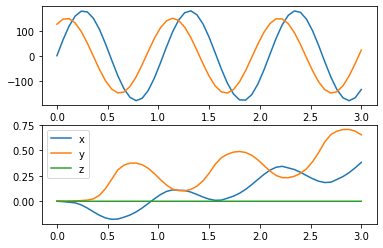

In [6]:
def visualize_demo():
    builder = DiagramBuilder()
    plant, scene_graph = AddMultibodyPlantSceneGraph(builder, time_step=0.06)
    Parser(plant).AddModelFromString(curr_urdf, "urdf")
    plant.Finalize()
    context = plant.CreateDefaultContext()

    amps = np.array([180.0,150.0]) # amplitudes of actuator sine waves
    freqs = 1.5*np.array([4,4]) # frequencies of actuator sine waves
    phases = np.array([0,1])
    command = builder.AddSystem(Sine(amps, freqs, phases))
    builder.Connect(command.get_output_port(0), plant.get_actuation_input_port())

    
    # print(command.get_output_port(0), plant.get_output_port(0))
    input_logger = LogVectorOutput(command.get_output_port(0), builder, publish_period=0.06)
    state_logger = LogVectorOutput(plant.get_output_port(1), builder, publish_period=0.06)
    # builder.Connect(command.get_output_port(1), plant.get_actuation_input_port())

    meshcat.Delete()
    meshcat.ResetRenderMode()
    MeshcatVisualizerCpp.AddToBuilder(builder, scene_graph, meshcat,MeshcatVisualizerParams(role=Role.kPerception, prefix="visual"))
    diagram = builder.Build()
    simulator = Simulator(diagram)

    print(plant.num_positions(),plant.num_velocities())
    test= np.zeros(41)
    
    State = namedview("State", [
        "quat", "xrot", "yrot", "zrot", 
        "xseg0", "yseg0", "zseg0", 
        "flw_theta0", "frw_theta0", "blw_theta0", "brw_theta0",
        "theta0", 
        "flw_theta1", "frw_theta1", "blw_theta1", "brw_theta1", 
        "theta1", 
        "flw_theta2", "frw_theta2", "blw_theta2", "brw_theta2",
        "xrotdot", "yrotdot", "zrotdot",
        "xseg0dot", "yseg0dot", "zseg0dot", 
        "flw_theta0dot", "frw_theta0dot", "blw_theta0dot", "brw_theta0dot", 
        "theta0dot",
        "flw_theta1dot", "frw_theta1dot", "blw_theta1dot", "brw_theta1dot",  
        "theta1dot",
        "flw_theta2dot", "frw_theta2dot", "blw_theta2dot", "brw_theta2dot",
    ])
    test[0] = 1
    test[1] = 0
    test[2] = 0
    test[3] = 0
    x0 = State(test)
    context = simulator.get_mutable_context()
    plant_context = plant.GetMyContextFromRoot(context)
    plant.SetPositionsAndVelocities(plant_context, x0[:])
    simulator.set_target_realtime_rate(.5)
    simulator.AdvanceTo(3)
    fig, ax = plt.subplots(2,1)
    input_log = input_logger.FindLog(simulator.get_context())
    state_log = state_logger.FindLog(simulator.get_context())
    ax[0].plot(input_log.sample_times(), input_log.data().T)
    ax[1].plot(state_log.sample_times(), state_log.data()[4:7].T)
    ax[1].legend(('x','y','z'))
    return input_log, state_log


input_log, state_log = visualize_demo()

print(len(state_log.sample_times()))
print(state_log.sample_times())


In [11]:
def direct_transcription():
    def callback_visualization(t,x,u,v):
        fig, axes = plt.subplots(2)
        colors = {0:'red', 1:'blue', 2:'green',3:'black',4:'yellow'}
        labels = {0:'x_pos', 1:'y_pos', 2:'quat2', 3:'quat3'}
        ulabels = {0:'seg1', 1:'seg2', 2:'seg3'}
        states = {0:4,1:5,2:1,3:2} # we display the x and y positions (4 and 5) of the base segment, seg0.
        for i in range(len(u[:,0])):
            axes[0].plot(t,u[i],colors[i],label=ulabels[i]) # actuator visualization
        for j in range(4):
            axes[1].plot(t,x[states[j]],colors[j],label=labels[j]) # state visualization
            axes[1].legend()


    builder = DiagramBuilder()
    dt = 0.06
    plant, scene_graph = AddMultibodyPlantSceneGraph(builder, time_step=dt)

    Parser(plant).AddModelFromString(curr_urdf, "urdf")
    plant.Finalize()

    input_port = builder.ExportInput(plant.get_actuation_input_port(), "input")
    diagram = builder.Build()
    context = diagram.CreateDefaultContext()
    testport = plant.get_actuation_input_port().get_index()
    N=50 # Num steps
    dirtran = DirectTranscription(
        diagram,
        context,
        N,
        )
    prog = dirtran.prog()
    #prog.decision_variables()[:plant.num_positions()]
    for t in range(N):
        AddUnitQuaternionConstraintOnPlant(plant,dirtran.state(t)[:plant.num_positions()],prog)
        prog.AddBoundingBoxConstraint(-0.1,0.1,dirtran.state(t)[6]) # z constraint keeps bot on ground
        prog.AddBoundingBoxConstraint(-0.15,0.15,dirtran.state(t)[1]) # quaternion constraint prevents roll/pitch
        prog.AddBoundingBoxConstraint(-0.15,0.15,dirtran.state(t)[2]) # quaternion constraint prevents roll/pitch

    initial_state = np.zeros(41)
    initial_state[0] = 1
    initial_state[3] = 0.#xy plane rotation # 0 and 3 can be anything (except both zero), 1 and 2 must be zero
    final_state = np.zeros(41)
    final_state[0] = 1
    final_state[5] = 1
    # initial_state[11] = .5
    # initial_state[16] = -1
    # initial_state[21] = 1
    offset = np.ones(41)*.03
    prog.AddBoundingBoxConstraint(initial_state-offset, initial_state+offset, # add tiny offsets to make it non degenerate
                                  dirtran.initial_state())
    #prog.AddBoundingBoxConstraint(-10,-5,dirtran.final_state()[5])
    #print(prog.decision_variables())
    R = .1  # Cost on input "effort".
    u = dirtran.input()
    x = dirtran.state()
    for i in range(len(u)):
        dirtran.AddConstraintToAllKnotPoints(u[i] <= 200)
        dirtran.AddConstraintToAllKnotPoints(u[i] >= -200)
    # dirtran.AddRunningCost(R * u[0]**2)
    # dirtran.AddRunningCost(R * u[1]**2)
    # dirtran.AddRunningCost(R * u[2]**2)
    # dirtran.AddRunningCost(.01*x[4]**2)
    # dirtran.AddRunningCost(x[5])


    # Add a final cost equal to the total duration.
    #dirtran.AddFinalCost(0.1*dirtran.final_state()[4]**2)
    dirtran.AddFinalCost(-(dirtran.final_state()[5])) # rewards negative y distance





    dirtran.AddCompleteTrajectoryCallback(callback=callback_visualization,
                                             names=[])
    def get_sin_samples(amps, freqs, phases, dt, num_timesteps):
        # Takes a 
        result = np.zeros((num_timesteps, 3))
        for i in range(num_timesteps):
            for j in range(3):
                result[i, j] = amps[j]*np.sin(freqs[j] * i * dt + phases[j])
        return result

    amps = np.array([90.0,120.0,105.0])
    freqs = np.array([2.5,2.5,2.5])
    phases = np.array([0,1.6,3.2])
    # sin_samples = get_sin_samples(amps, freqs, phases, dt, N)
    breaks = np.linspace(0, (N-1)*dt, N)
    initial_x = PiecewisePolynomial.ZeroOrderHold(np.array(state_log.sample_times()), state_log.data())
    initial_u = PiecewisePolynomial.ZeroOrderHold(np.array(state_log.sample_times()), input_log.data())
    dirtran.SetInitialTrajectory(initial_u, initial_x)

    snopt = SnoptSolver().solver_id()
    prog.SetSolverOption(snopt, 'Iterations Limits', 1e5 if running_as_notebook else 1)
    result = Solve(prog)
    print(result.get_solver_details().info)
    print(prog.GetAllCosts())
    print(result.is_success())

    # assert result.is_success()
    print(result.get_solver_details().info)
    print(result.is_success())

    u_trajectory = dirtran.ReconstructInputTrajectory(result)

    # Animate the results.
    x_trajectory = dirtran.ReconstructStateTrajectory(result)
    return x_trajectory, u_trajectory

x_trajectory, u_trajectory = direct_transcription()

In [12]:
def percent_change():
    initial_y_dist = state_log.data()[5,-1]
    optimized_y_dist = x_trajectory.value(x_trajectory.end_time())[5]
    return (optimized_y_dist-initial_y_dist)/(initial_y_dist)
percent_change()

array([0.08769733])

In [ ]:
def play_trajectory(u_trajectory): 
    builder = DiagramBuilder()
    plant, scene_graph = AddMultibodyPlantSceneGraph(builder, time_step=.06) 
    Parser(plant).AddModelFromString(curr_urdf, "urdf")
    plant.Finalize()

    inputTraj = builder.AddSystem(TrajectorySource(u_trajectory))

    builder.Connect(inputTraj.get_output_port(0), plant.get_actuation_input_port())

    meshcat.Delete()
    meshcat.ResetRenderMode()
    MeshcatVisualizerCpp.AddToBuilder(builder, scene_graph,meshcat)

    diagram = builder.Build()

    # Set up a simulator to run this diagram
    simulator = Simulator(diagram)
    context = simulator.get_mutable_context()
    plant_context = plant.GetMyContextFromRoot(context)

    test= np.zeros(51)[:plant.num_positions()+plant.num_velocities()]
    
    State = namedview("State", [
        "quat", "xrot", "yrot", "zrot", 
        "xseg0", "yseg0", "zseg0", 
        "flw_theta0", "frw_theta0", "blw_theta0", "brw_theta0",
        "theta0", 
        "flw_theta1", "frw_theta1", "blw_theta1", "brw_theta1", 
        "theta1", 
        "flw_theta2", "frw_theta2", "blw_theta2", "brw_theta2",
        "theta2", 
        "flw_theta3", "frw_theta3", "blw_theta3", "brw_theta3",
        "xrotdot", "yrotdot", "zrotdot",
        "xseg0dot", "yseg0dot", "zseg0dot", 
        "flw_theta0dot", "frw_theta0dot", "blw_theta0dot", "brw_theta0dot", 
        "theta0dot",
        "flw_theta1dot", "frw_theta1dot", "blw_theta1dot", "brw_theta1dot",  
        "theta1dot",
        "flw_theta2dot", "frw_theta2dot", "blw_theta2dot", "brw_theta2dot",
        "theta2dot",
        "flw_theta3dot", "frw_theta3dot", "blw_theta3dot", "brw_theta3dot",
    ][:plant.num_positions()+plant.num_velocities()])
    test[0] = 1
    test[1] = 0
    test[2] = 0
    test[3] = 0
    
    x0 = State(test)
    context = simulator.get_mutable_context() 
    plant_context = plant.GetMyContextFromRoot(context)
    plant.SetPositionsAndVelocities(plant_context, x0[:])
    
    # Simulate
    simulator.set_target_realtime_rate(.5 if running_as_notebook else 0.0)
    simulator.AdvanceTo(3.0 if running_as_notebook else 0.1)
play_trajectory(u_trajectory)


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=846e1a7d-fb2b-4b22-a446-112d72222ae3' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>